## Import libraries.

Import all the necessary libraries.

In [124]:
import random
import numpy as np
import matplotlib.pyplot as plt

## Define constants.

In [125]:
# Constants for directions and colors
UP = (0, 1)
DOWN = (0, -1)
LEFT = (-1, 0)
RIGHT = (1, 0)
OUR_COLOR = "O"
OTHER_COLOR = "X"
TARGET=1000

## Define all the functions.

Here we define:
- **got_empty_neighbors** function: it checks which are the empty spots around the node, then add those to the empy_neighbors set if the next node is not in grid dictionary. Return the empty_neighbors set.
        
- **grow_cluster** function: it chooses a new node from the empty_neighbors set, then add to that node our colour. It also add the node to the grid dictionary and to the cluster.
        
- **model_grow** function: it takes the target size, creates the grid and cluster seeds, and gives grid and cluster with the desired size.

- **plot_grid** function: this funcion simply plot in a fancy way the cluster with target size. The **seed** is the black cell, the purple represent the EGM cluster.   


In [126]:
# Function to get neighboring empty sites of the cluster
def get_empty_neighbors(grid, cluster):
    directions = [UP, DOWN, LEFT, RIGHT]
    empty_neighbors = set()

    for node in cluster:
        for direction in directions:
            next_node = (node[0] + direction[0], node[1] + direction[1])
            if next_node not in grid:
                empty_neighbors.add(next_node)

    return list(empty_neighbors)

def grow_cluster(grid, cluster):
    empty_neighbors = get_empty_neighbors(grid, cluster)
    new_node = random.choice(empty_neighbors)
    grid[new_node] = OUR_COLOR
    cluster.append(new_node)
    return True

def model_growth(target_size):
    grid = {(0,0): OUR_COLOR}
    cluster = [(0, 0)]

    while len(cluster) < target_size:
        if not grow_cluster(grid, cluster):
            break
        if len(cluster) >= target_size:
            return grid, cluster

    return None, None

def plot_grid(grid):
    min_x = min([key[0] for key in grid])
    max_x = max([key[0] for key in grid])
    min_y = min([key[1] for key in grid])
    max_y = max([key[1] for key in grid])

    # Initialize a matrix with white values
    matrix = np.ones((max_y-min_y+1, max_x-min_x+1, 3))

    # Fill the matrix based on grid values
    for (x, y), _ in grid.items():

        if x==0 and y == 0:
            matrix[max_y, -min_x] = [0, 0, 0]  # Black for the seed node
        else:
            matrix[max_y-y, x-min_x] = [0.6901960784313725, 0.12549019607843137, 0.8627450980392157]  # Fancy purple for our cluster nodes

    # Plot the matrix
    plt.imshow(matrix)
    plt.axis('off')
    plt.show()

## Run the model.

In this code cell we actually run the model to generate our EGM cluster with target size. 
The code continue to run until a cluster with desired size is generated.

Cluster of size 1000


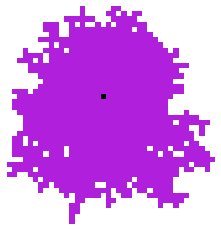

In [132]:
while True:
    grid, cluster = model_growth(TARGET)
    if grid:  # If we obtained a grid, that means we got a cluster of required size.
        print("Cluster of size", len(cluster))
        plot_grid(grid)
        break